## Note - Had to recreate this lab in my personal jupyter environment because I couldnt get it to respond in skills network. Hence many of the extra pictures,etc are not present

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [66]:
import requests
import pandas as pd
import io

# Dataset URL
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Fetch the content
response = requests.get(URL1)
response.raise_for_status()  # Ensure we got a valid response

# Read into pandas
data = pd.read_csv(io.StringIO(response.text))

# Display the first few rows
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [67]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(io.StringIO(response2.text))

In [68]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### Task1

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [69]:
Y = data['Class'].to_numpy()
print(Y)
print(f'{len(Y)} rows in this array')

[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
90 rows in this array


### Task2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

### Task3

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)

In [72]:
y_test.shape

(18,)

### Task4

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [73]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

cv=10 # Set cross validation
lr = LogisticRegression()  # Set the model estimator

#  Setup grid search
logreg_cv = GridSearchCV(estimator=lr,
                   param_grid=parameters,
                   cv=cv)
# Fit the grid model
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [74]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


### Task5

Calculate the accuracy on the test data using the method <code>score</code>:

In [75]:
test_acc_lr = logreg_cv.score(X_test, y_test)
print('Test accuracy for Logistic Regression model :', test_acc_lr)

Test accuracy for Logistic Regression model : 0.8333333333333334


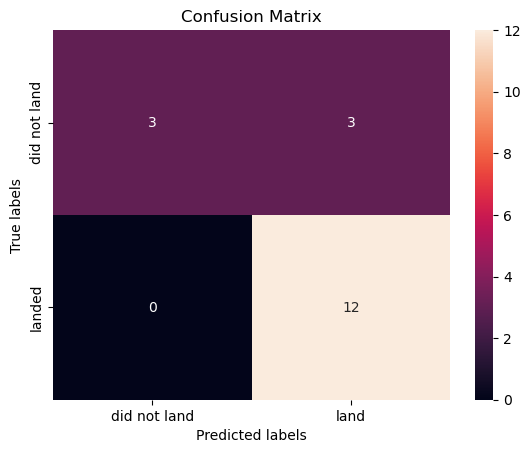

In [76]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(y_test, yhat)

## Task 6
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [77]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
cv=10
svm = SVC()

svm_cv = GridSearchCV(estimator=svm,
                     param_grid=parameters,
                     cv=cv)
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [78]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## Task 7
Calculate the accuracy on the test data using the method <code>score</code>:

In [79]:
test_acc_svm = svm_cv.score(X_test, y_test)
print('Test accuracy for SVC model :', test_acc_svm)

Test accuracy for SVC model : 0.8333333333333334


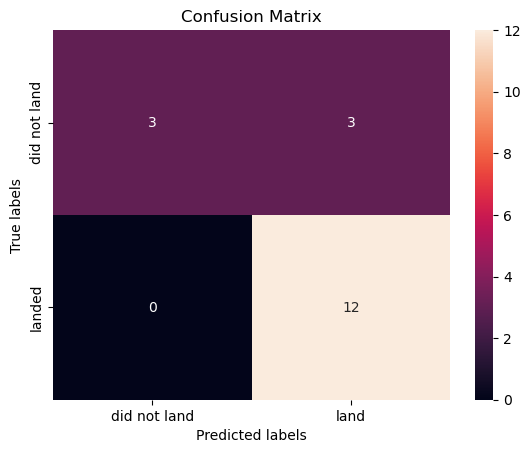

In [80]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## Task 8
Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [81]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
cv=10
tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree,
                      param_grid=parameters,
                      cv=cv)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [82]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8910714285714286


## Task 9
Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [83]:
test_acc_tree = tree_cv.score(X_test, y_test)
print('Test accuracy for Decision Tree model :', test_acc_tree)

Test accuracy for Decision Tree model : 0.7777777777777778


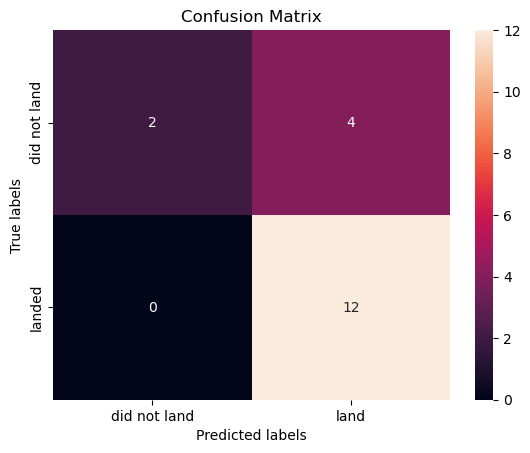

In [84]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## Task 10
Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [85]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
cv=10
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN,
                   param_grid=parameters,
                   cv=cv)

knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [86]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## Task 11
Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

In [87]:
test_acc_knn = knn_cv.score(X_train, y_train)
print('Test accuracy for KNN model :', test_acc_knn)

Test accuracy for KNN model : 0.8611111111111112


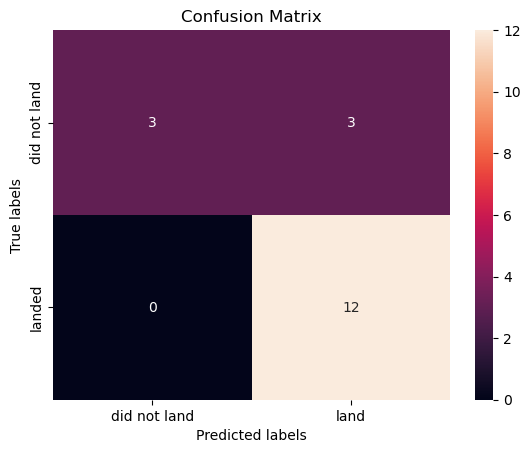

In [88]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

## Task 12
Find the method performs best:

K Nearest Neighbor performed the best given the accuracy of test data having the highest score. Although the confusion matrix for 3 of the models were idenitical.

In [89]:
acc_dict = {
    'Logistic Regression': test_acc_lr, 
    'Support Vector Machine': test_acc_svm,
    'Decision Tree': test_acc_tree,
    'K-Nearest Neighbor': test_acc_knn 
}
acc_df = pd.DataFrame(list(acc_dict.items()), columns=['Model', 'Accuracy'])
acc_df

,Model,Accuracy
0,Logistic Regression,0.833333
1,Support Vector Machine,0.833333
2,Decision Tree,0.777778
3,K-Nearest Neighbor,0.861111


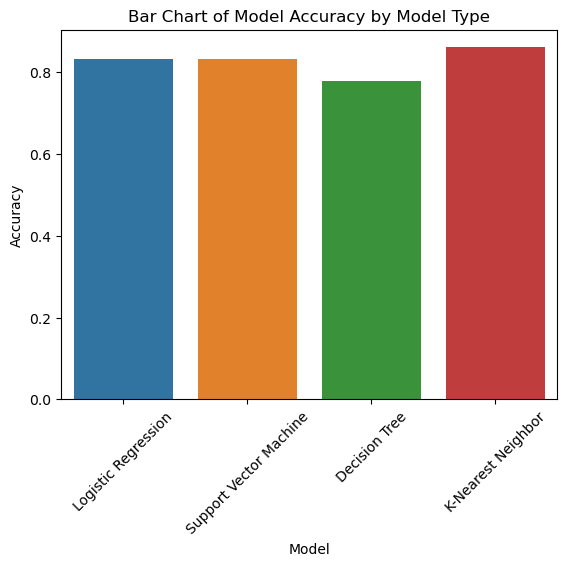

In [90]:
sns.barplot(x='Model', y='Accuracy', data=acc_df)
plt.title('Bar Chart of Model Accuracy by Model Type')
plt.xticks(rotation=45)
plt.show()

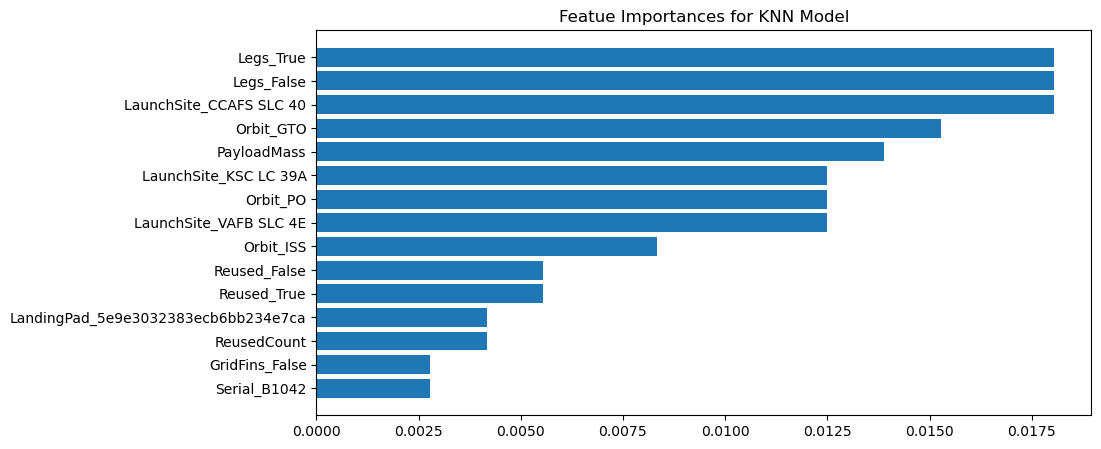

,index,Feature,Importance
0,82,Legs_True,0.018056
1,81,Legs_False,0.018056
2,16,LaunchSite_CCAFS SLC 40,0.018056
3,7,Orbit_GTO,0.015278
4,1,PayloadMass,0.013889
5,17,LaunchSite_KSC LC 39A,0.012500
6,12,Orbit_PO,0.012500
7,18,LaunchSite_VAFB SLC 4E,0.012500
8,9,Orbit_ISS,0.008333
9,79,Reused_False,0.005556


In [108]:
from sklearn.inspection import permutation_importance
best_knn = knn_cv.best_estimator_  # Get the feature importance from the best model

feature_names = X.columns  # Get names from the df X_train

result = permutation_importance(best_knn, X_train, y_train, scoring='accuracy', n_repeats=10, random_state=2)

feature_importance_df = pd.DataFrame({
    'Feature': feature_names, 
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False).reset_index()

importance_df = feature_importance_df.iloc[:15, :]

plt.figure(figsize=(10,5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Featue Importances for KNN Model')

plt.gca().invert_yaxis()

plt.show()
importance_df